In [1]:
import pandas as pd
%matplotlib inline

# Life Expectancy
Life expectancy in years, at birth and for age groups. Breakdowns are also given for deprivation (SIMD) and Urban Rural classification.

Life expectancy refers to the number of years that a person could expect to survive if the current mortality rates for each age group, sex and geographic area remain constant throughout their life. This is referred to as ‘period life expectancy’ and does not usually reflect the actual number of years that a person will survive. This is because it does not take into account changes in health care and other social factors that may occur through someone’s lifetime. However, life expectancy is a useful statistic as it provides a snapshot of the health of a population and allows the identification of inequalities between populations..

Further details are available on the [NRS website](https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/life-expectancy).

In [2]:
df_raw = pd.read_csv('../data/LifeExpectancy+.csv')
df_raw.head()

,FeatureCode,DateCode,Measurement,Units,Value,Sex,Age,SIMD quintiles,Urban Rural Classification,place_name
0,S12000039,2014-2016,Count,Years,78.85,Female,0,All,All,West Dunbartonshire
1,S12000039,2014-2016,95% Lower Confidence Limit,Years,53.96,Female,25-29,All,All,West Dunbartonshire
2,S12000039,2014-2016,95% Upper Confidence Limit,Years,55.17,Female,25-29,All,All,West Dunbartonshire
3,S12000039,2014-2016,95% Lower Confidence Limit,Years,49.09,Female,30-34,All,All,West Dunbartonshire
4,S12000039,2015-2017,95% Lower Confidence Limit,Years,69.63,Male,5-9,All,All,West Dunbartonshire


## Having a look

In [3]:
df_raw.columns

Index(['FeatureCode', 'DateCode', 'Measurement', 'Units', 'Value', 'Sex',
       'Age', 'SIMD quintiles', 'Urban Rural Classification', 'place_name'],
      dtype='object')

In [4]:
df_raw['Units'].unique()

array(['Years'], dtype=object)

In [5]:
df_raw['DateCode'].unique()

array(['2014-2016', '2015-2017', '2000-2002', '2013-2015', '2002-2004',
       '2011-2013', '2008-2010', '1994-1996', '2010-2012', '2012-2014',
       '1995-1997', '1999-2001', '2009-2011', '2003-2005', '1992-1994',
       '2004-2006', '1993-1995', '2005-2007', '1991-1993', '1996-1998',
       '2006-2008', '2007-2009', '2001-2003', '1997-1999', '1998-2000'],
      dtype=object)

In [6]:
df_raw['Measurement'].unique()

array(['Count', '95% Lower Confidence Limit',
       '95% Upper Confidence Limit'], dtype=object)

In [7]:
df_raw['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df_raw['SIMD quintiles'].unique()

array(['All', '5 - least deprived', '4', '3', '1 - most deprived', '2'],
      dtype=object)

In [9]:
df_raw['place_name'].unique()

array(['West Dunbartonshire', 'West Lothian', 'Scotland',
       'Clackmannanshire', 'Dumfries and Galloway', 'East Ayrshire',
       'East Lothian', 'East Renfrewshire', 'Na h-Eileanan Siar',
       'Falkirk', 'Highland', 'Inverclyde', 'Midlothian', 'Moray',
       'North Ayrshire', 'Orkney Islands', 'Scottish Borders',
       'Shetland Islands', 'South Ayrshire', 'South Lanarkshire',
       'Stirling', 'Aberdeen City', 'Aberdeenshire', 'Argyll and Bute',
       'City of Edinburgh', 'Renfrewshire', 'Angus', 'Dundee City',
       'East Dunbartonshire', 'Ayrshire and Arran', 'Borders',
       'Forth Valley', 'Grampian', 'Lothian', 'Orkney', 'Shetland',
       'Western Isles', 'Aberdeen Central', 'Aberdeen Donside',
       'Aberdeen South and North Kincardine', 'Aberdeenshire East',
       'Aberdeenshire West', 'Airdrie and Shotts', 'Almond Valley',
       'Angus North and Mearns', 'Angus South', 'Ayr',
       'Banffshire and Buchan Coast', 'Caithness, Sutherland and Ross',
       'Carri

In [10]:
df_raw['Urban Rural Classification'].unique()

array(['All', 'Accessible rural', 'Remote small towns', 'Remote rural',
       'Other urban areas', 'Large urban areas', 'Accessible small towns'],
      dtype=object)

In [11]:
target_cols = ['Sex', 'Age', 'Value']

is_count = df_raw['Measurement'] == 'Count'
whole_scotland = df_raw['place_name'] == 'Scotland'
all_SIMD_quintiles = df_raw['SIMD quintiles'] == 'All'
all_Urban_Rural_Classification = df_raw['Urban Rural Classification'] == 'All'

df = df_raw.loc[is_count & whole_scotland & all_SIMD_quintiles & all_Urban_Rural_Classification, target_cols]

In [12]:
def parse_age(s):
    if s == '90+':
        return 90
    if '-' in s:
        low, high = s.split('-')
        return (int(low)+int(high))/2
    else:
        return int(s)
    
df.Age = df.Age.apply(parse_age)

## Clean Subset

In [13]:
mean_hle = df.groupby(['Age'])['Value'].mean()
cumulative_mean_hle = mean_hle + mean_hle.index

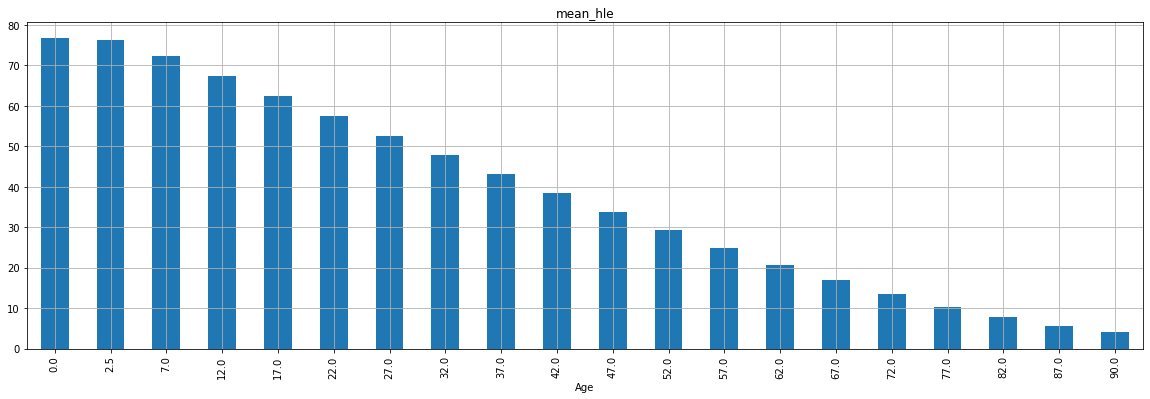

In [14]:
mean_hle.plot.bar(figsize=(20,6), grid=True, title='mean_hle')

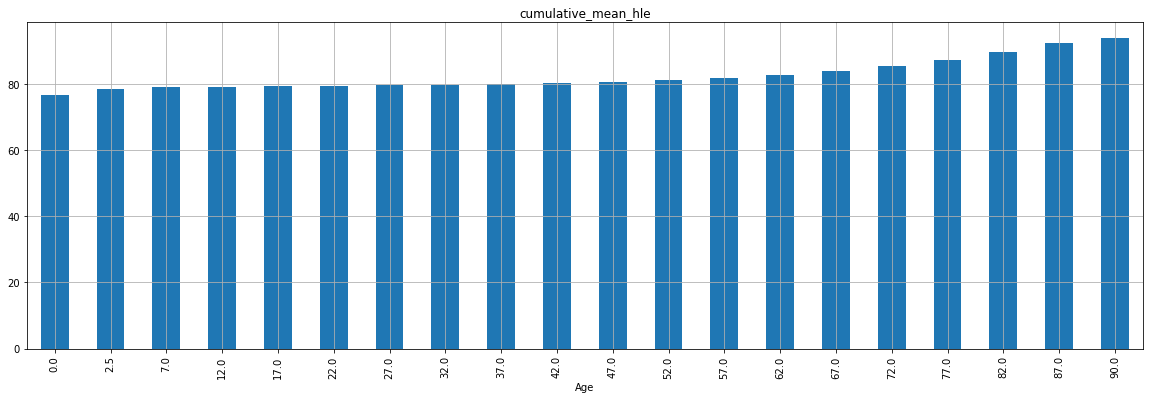

In [15]:
cumulative_mean_hle.plot.bar(figsize=(20,6), grid=True, title='cumulative_mean_hle')

In [16]:
gender_mean_hle = df.groupby(['Age', 'Sex'])['Value'].mean().unstack()
cumulative_gender_mean_hle = gender_mean_hle.add(gender_mean_hle.index, axis=0)

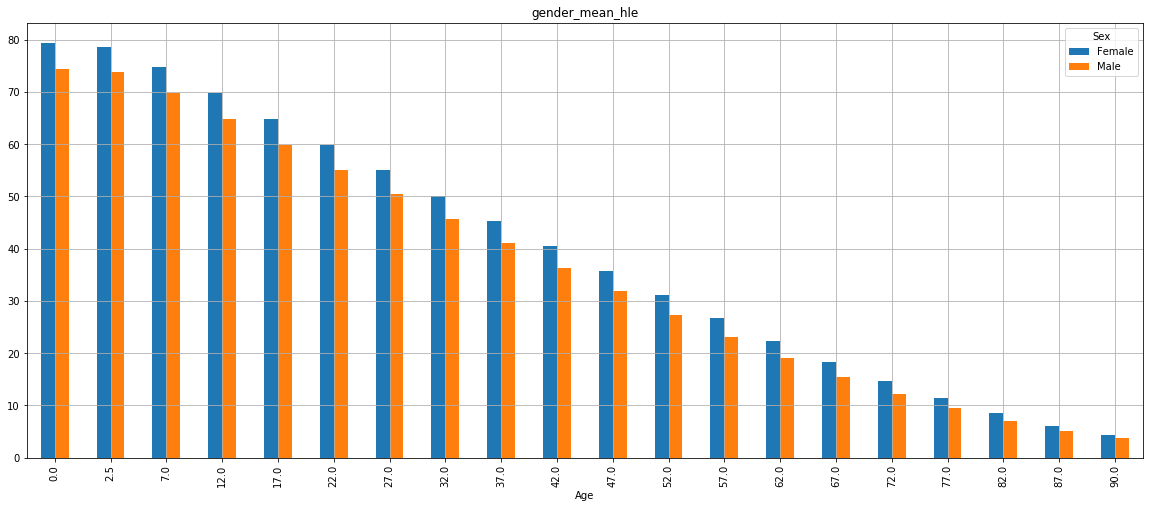

In [17]:
gender_mean_hle.plot.bar(figsize=(20,8), grid=True, title='gender_mean_hle')

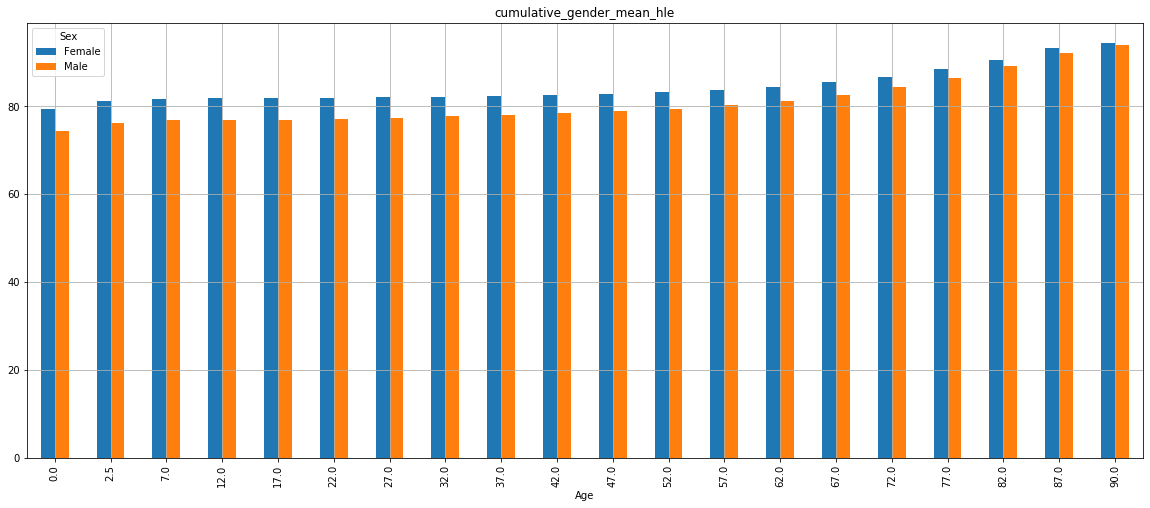

In [18]:
cumulative_gender_mean_hle.plot.bar(figsize=(20,8), grid=True, title='cumulative_gender_mean_hle')